In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
im = './currentAFMImage.png'
imc = './circle.png'
imc = './design.png'


In [41]:
img = cv2.imread(im,0)
imgx = cv2.equalizeHist( img );
pat = img[20:50,100:128]
imgc = cv2.imread(imc,0)
imgd = cv2.imread(imc,0)
imgs = cv2.imread('./circle_clean.png',0)
# img = cv2.medianBlur(img,25)

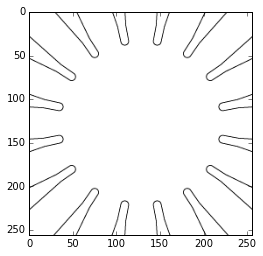

In [9]:
plt.imshow(imgs,cmap='gray')

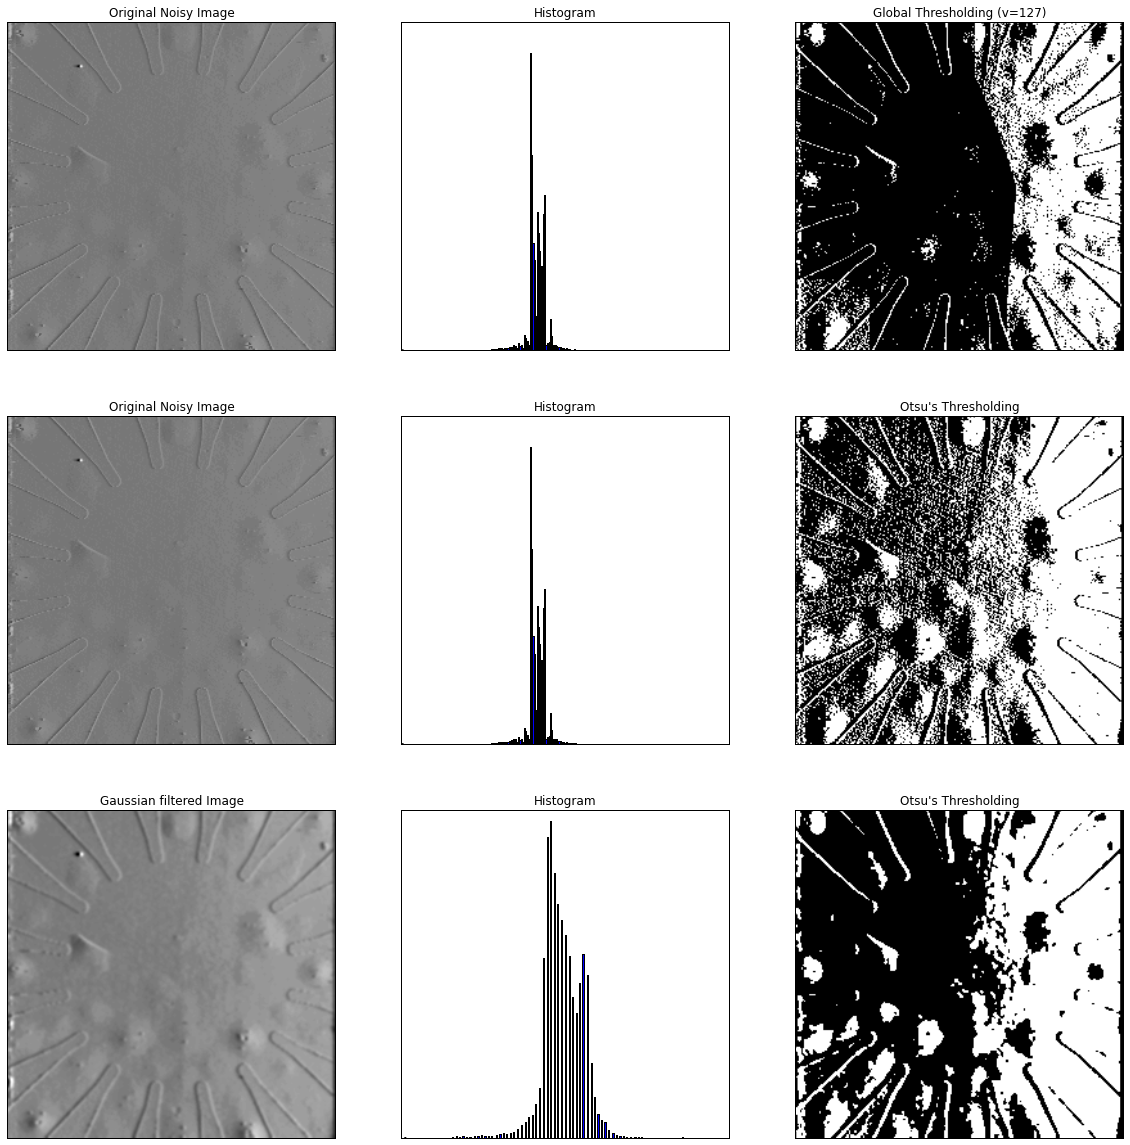

In [10]:

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(20,20))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

(<matplotlib.text.Text at 0x108aad390>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

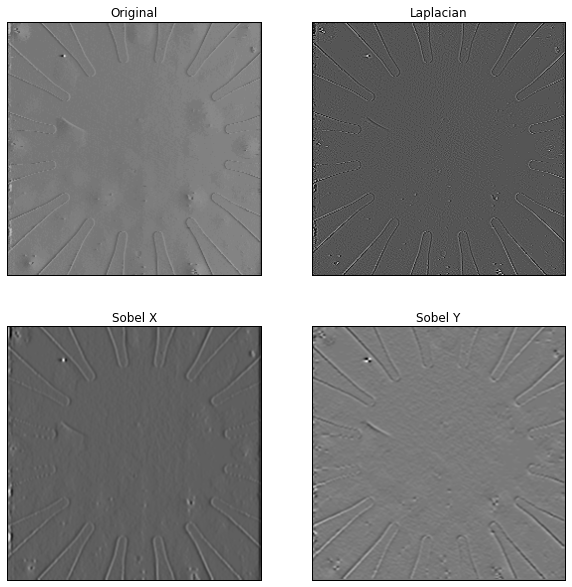

In [11]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray',vmin=-100,vmax = 200)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

(<matplotlib.text.Text at 0x10cd67160>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

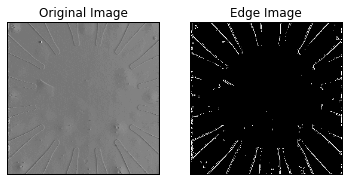

In [12]:
edges = cv2.Canny(img,100,100)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

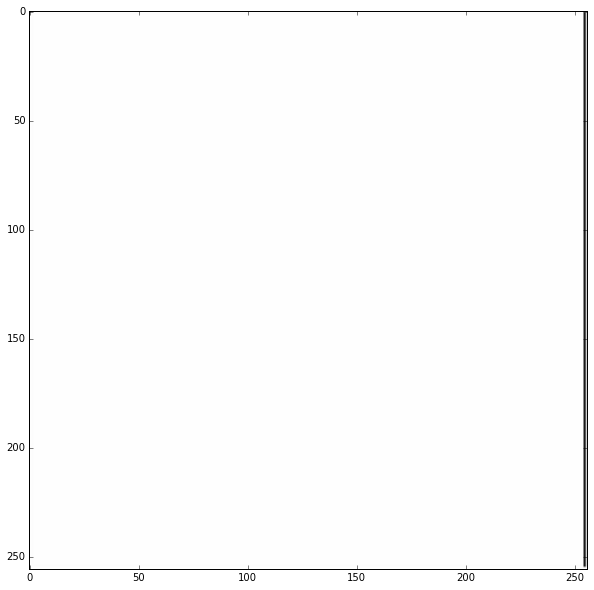

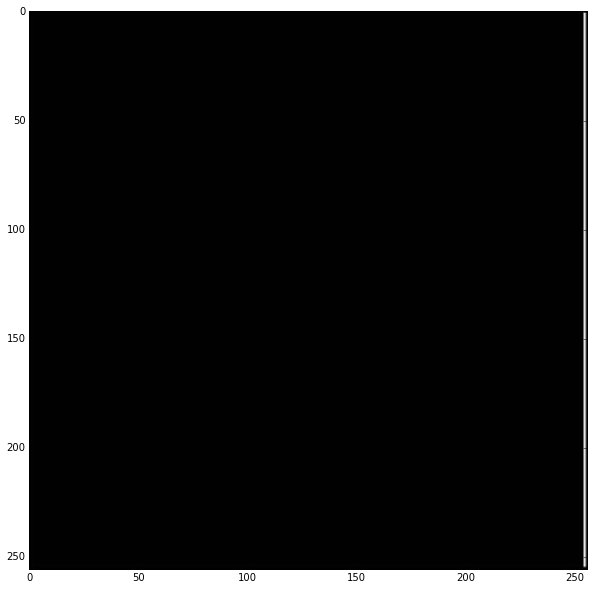

In [40]:

ret_lo,thresh_lo = cv2.threshold(img,img.mean()-13,255,0)
ret_hi,thresh_hi = cv2.threshold(img,img.mean()+10,255,0)
image, contours, hierarchy = cv2.findContours(img, 2, 2)
plt.figure(figsize=(10,10))
plt.imshow(image*-1,cmap = 'gray')
plt.figure(figsize=(10,10))
plt.imshow(image,'gray')
cnt = contours[0]
M = cv2.moments(cnt)
area = cv2.contourArea(cnt)

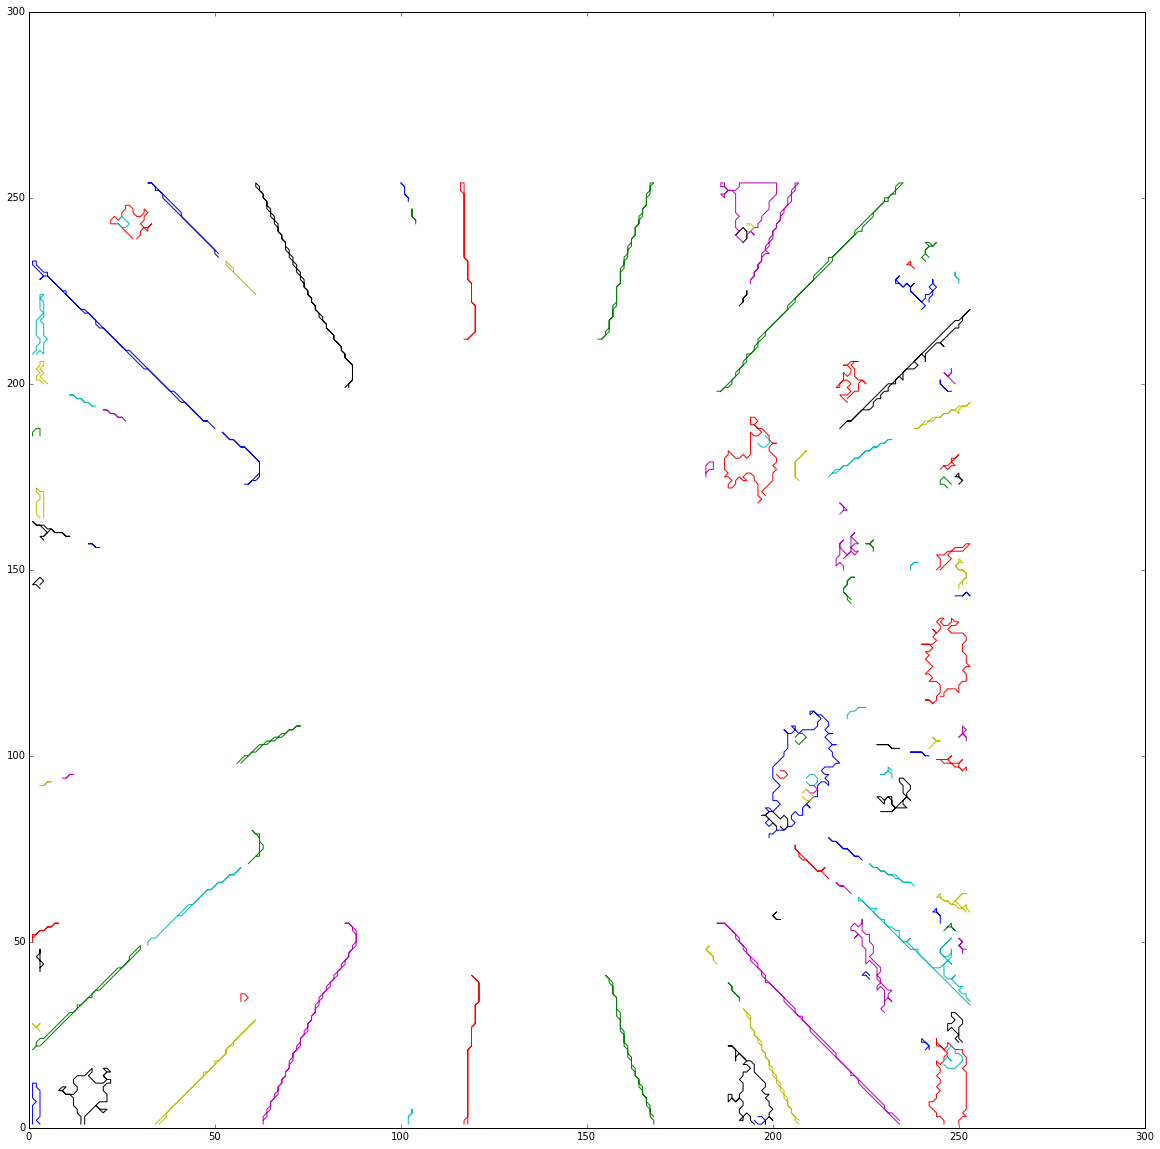

In [39]:
plt.figure(figsize=(20,20))
for c in contours:
    if c.shape[0]>4:
        dd = c.flatten().reshape(-1,2)
        plt.plot(dd[:,0],dd[:,1])
#         print()
#     print(c.shape[0])
#     print(c.data.tolist())

In [15]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged


In [16]:
tight

NameError: name 'tight' is not defined

In [ ]:

image = np.invert(img)
gray = image
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
print(blurred.mean())
tight = cv2.Canny(blurred, 20, 80)

# plt.figure(figsize=(10,10))
# # show the images
# plt.imshow(blurred,cmap='gray')
plt.figure(figsize=(10,10))
plt.imshow(tight,cmap='gray')
# cv2.waitKey(0)

253.378662109


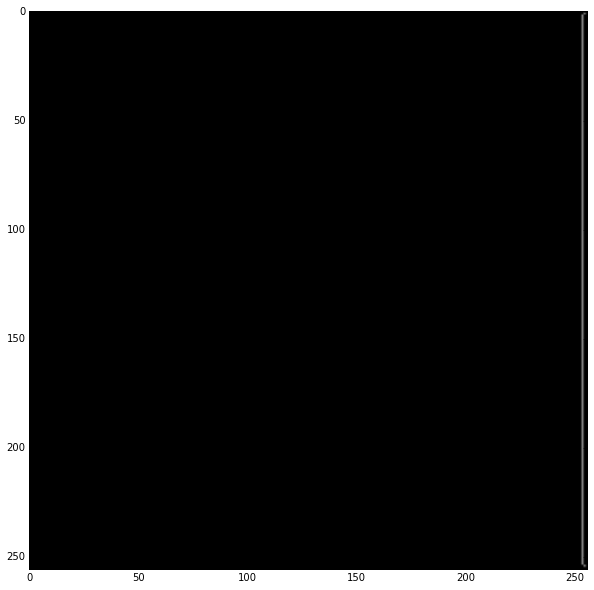

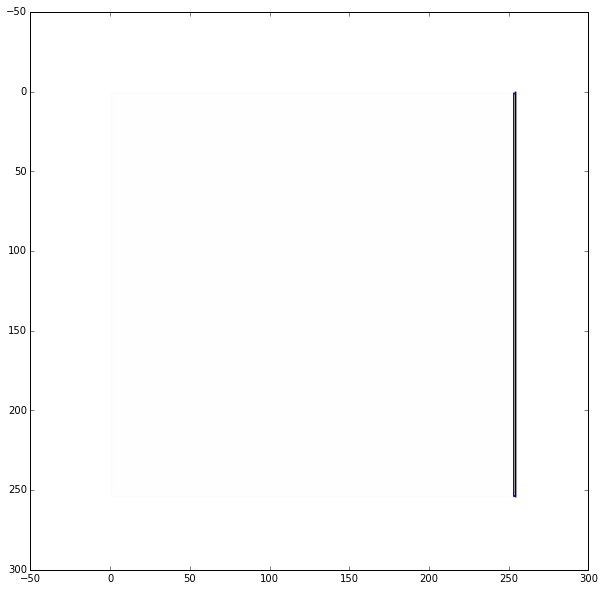

In [35]:

image = np.invert(img)
gray = image
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
print(blurred.mean())
tight = cv2.Canny(blurred, 20, 80)

# plt.figure(figsize=(10,10))
# # show the images
# plt.imshow(blurred,cmap='gray')
plt.figure(figsize=(10,10))
plt.imshow(tight,cmap='gray')
# cv2.waitKey(0)
# ret_lo,thresh_lo = cv2.threshold(img,img.mean()-13,255,0)
# ret_hi,thresh_hi = cv2.threshold(img,img.mean()+10,255,0)
image, contours, hierarchy = cv2.findContours(tight, 2, 2)
plt.figure(figsize=(10,10))
plt.imshow(np.invert(img),cmap = 'gray')

for c in contours:
    if c.shape[0]>4:
        dd = c.flatten().reshape(-1,2)
        plt.plot(dd[:,0],dd[:,1])
        

In [18]:
import pandas as pd
lns = [ll[0] for ll in lines]
lns = [ll for ll in lns]
lns = np.array(lns)
np.shape(lns)
lns
ss = pd.DataFrame(lns,columns=['rho','theta'])
ss.head()


ss.theta.unique()

NameError: name 'lines' is not defined

In [ ]:
plt.plot(ss.theta[ss.theta>1.552],'r.')
plt.plot(ss.theta[ss.theta<1.552],'b.')
plt.hlines(ss.theta[ss.theta>1.552].mean(),0,90)
plt.hlines(ss.theta[ss.theta<1.552].mean(),0,90)
a = 180*ss.theta[ss.theta<1.552].mean()/np.pi
b = 180*ss.theta[ss.theta>1.552].mean()/np.pi
print(a,b,a+b)

In [57]:
plt.figure(figsize=(10,10))
imi = np.invert(cv2.imread(im,0))
lines = cv2.HoughLines(tight, 1, (np.pi/180)/(36*2), 40)
print(np.shape(lines))
xx = []
yy = []
for ll in lines:
    if len(ll)>1:
        print(ll)
    for rho,theta in ll:
#         if abs(theta)<0.05:
#             continue
#         if abs(theta)>3.09:
#             continue
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        
#         if x0<50 or y0<50:
#             continue
#         if x0>200 or y0>200:
#             continue
#         if y0<100 or x0>150:
#             continue
#         if x0<100 or y0>150:
#             continue
#         if abs(theta)>3.04:
#             continue
            
#         print(x0,y0)
#         x0 = 128
#         y0 = 128
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        xx.append(x0)
        yy.append(y0)

        #     cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    # for ll in lines:
    #     print(ll[0])
        plt.plot(x0,y0,'go')
        cv2.line(imi,(x1,y1),(x2,y2),(0,255,0),1)
        

plt.imshow(imi,cmap = 'gray')
plt.plot(np.mean(xx),np.mean(yy),'ro')
plt.hlines(np.mean(yy), 0, 255,'r')
plt.vlines(np.mean(xx),0,255,'r')
# plt.xlim(0,255)
# plt.ylim(0,255)

()


TypeError: 'NoneType' object is not iterable

In [ ]:
xx

In [ ]:

ret_lo,thresh_lo = cv2.threshold(imgd,img.mean()-15,255,0)
ret_hi,thresh_hi = cv2.threshold(imgd,img.mean()+15,255,0)
imaged, contours, hierarchy = cv2.findContours(thresh_lo-thresh_hi, 2, 2)
plt.figure(figsize=(15,15))
plt.imshow(image*-1,cmap = 'gray')
plt.figure(figsize=(15,15))
plt.imshow(image*-1,cmap = 'gray')
cnt = contours[0]
M = cv2.moments(cnt)
area = cv2.contourArea(cnt)

In [ ]:
areas = np.array([cv2.contourArea(cnt) for cnt in contours])
areas.sort()
plt.plot(areas,'r.')
plt.ylim(0,20)
plt.figure(figsize=(20,20))
plt.imshow(image*-1,cmap = 'gray')
for cnt in contours:
    area = cv2.contourArea(cnt)
    if (area>0) & (area<2000):
        epsilon = 0.1*cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt,epsilon,True)
        app = approx.reshape(-1,2)
        plt.plot(app[:,0],app[:,1])

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BAYER_BG2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
edges = image
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
plt.imshow(edges,cmap = 'gray')
for x1,y1,x2,y2 in lines[0]:
    plt.plot((x1,y1),(x2,y2),'g')
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)



In [ ]:
# img = cv2.imread(im,0)
# ret, thresh = cv2.threshold(img,140,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plt.imshow(thresh,cmap='gray')
# plt.imshow(imc,cmap='gray')
plt.figure(figsize=(20,20))
plt.imshow(img,cmap = 'gray',extent=(0,45,0,45))
plt.imshow(imgd,cmap = 'gray',alpha=0.5,extent=(1,44,1,44))
plt.xlim(0,45)
plt.ylim(0,45)

In [ ]:
plt.imshow(img,cmap = 'gray')

In [ ]:
# dd = 
img1 = cv2.equalizeHist( img );
img2 = pat

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# # Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

plt.imshow(img3),plt.show()

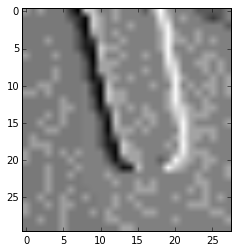

In [19]:

plt.imshow(pat,cmap='gray')

[[-0.00698442]]


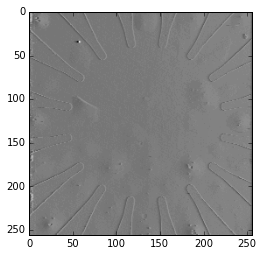

In [20]:
imgx = img
template = imgd
th, tw = template.shape[:2]

result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

print(result)

# values = cv2.matchTemplate(image, template, method=cv.CV_TM_SQDIFF)
threshold = 0
loc = np.where(result >= threshold)
for pt in zip(*loc[::-1]):
    print(pt)
    imgx = cv2.rectangle(pt, (pt[0] + tw, pt[1] + th), 0, 2)

plt.imshow(imgx,cmap='gray')
# plt.imshow(imgd,cmap='gray')

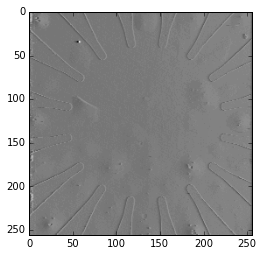

In [21]:
plt.imshow(img,cmap='gray')

In [22]:
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()
img = imgd
kp, des = sift.detectAndCompute(imgd,None)

In [23]:
img2 = cv2.drawKeypoints(imgd,kp,None,(255,0,0),4)

In [24]:
pd = np.invert(imaged)
pp = np.invert(image)
plt.imshow(pp,cmap='gray')

NameError: name 'imaged' is not defined

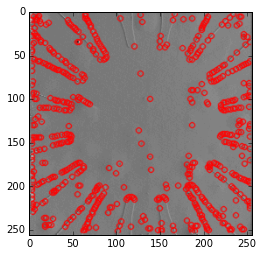

In [47]:
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)
# print(len(kp))
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))

plt.imshow(img2,cmap='gray')
# plt.figure()
# Disable nonmaxSuppression
# fast.setNonmaxSuppression(200)
# kp = fast.detect(pp,None)

# img3 = cv2.drawKeypoints(pp, kp, None,color=(255,0,0))

# plt.imshow(img2)

In [43]:
# fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(ddd,None)
kkpa = np.array([a.pt for a in kp])
img2 = cv2.drawKeypoints(ddd, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: ", fast.getThreshold())
print( "nonmaxSuppression: ", fast.getNonmaxSuppression())
print( "neighborhood: ", fast.getType())
print( "Total Keypoints with nonmaxSuppression: ", len(kp))


plt.imshow(img2)
plt.figure()

# Disable nonmaxSuppression
# fast.setNonmaxSuppression(10)
kp = fast.detect(img,None)
kkpb = np.array([a.pt for a in kp])
# img3 = cv2.drawKeypoints(np.zeros_like(img)+255, kp, None,color=(255,0,0))

# plt.imshow(img3)


NameError: name 'ddd' is not defined

In [26]:
fast = cv2.FastFeatureDetector_create()
kp = fast.detect(imgs,None)
kkpa = np.array([a.pt for a in kp])

kp = fast.detect(pp,None)
kkpb = np.array([a.pt for a in kp])


plt.figure(figsize=(20,20))
plt.imshow(img,cmap='gray')
plt.plot(kkpa[:,0],kkpa[:,1],'ro')
plt.plot(kkpb[:,0],kkpb[:,1],'b.')

kp1 = fast.detect(imgd,None)
kp2 = fast.detect(pat,None)
des1 = orb.compute(img,kp1)
des2 = orb.compute(pat,kp2)

NameError: name 'pp' is not defined

In [27]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False,)

# Match descriptors.
# matches = bf.knnMatch(des1[-1],des2[-1],k=2)

In [28]:

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = bf.knnMatch(des1[-1],des2[-1],k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches[:100]):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(imgd,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,)

NameError: name 'des1' is not defined

In [29]:
img.shape

(256, 256)

In [30]:
img[:,:50]

array([[149, 149, 149, ..., 149, 149, 149],
       [169, 169, 169, ..., 169, 169, 169],
       [169, 169, 169, ..., 169, 171, 169],
       ..., 
       [169, 169, 169, ..., 169, 169, 169],
       [169, 169, 169, ..., 169, 169, 169],
       [169, 169, 169, ..., 169, 169, 169]], dtype=uint8)

/Users/Merlin/anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


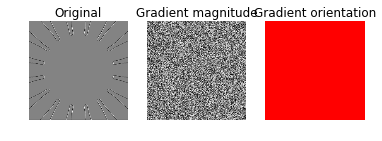

In [31]:
from scipy import signal
from scipy import misc
lena = img[::-1,:]
scharr = img[10:-1,10:-10]
grad = signal.correlate2d(lena, scharr, boundary='wrap', mode='same')
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(1, 3)
ax_orig.imshow(lena, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()
fig.show()



123.021788194


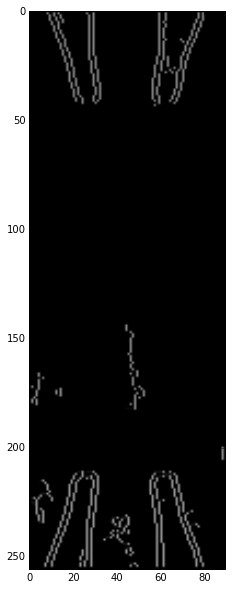

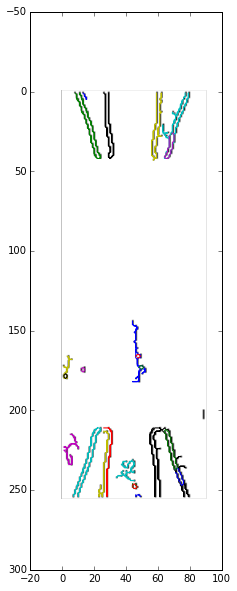

In [54]:
image = img[:,90:180]
gray = image
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
print(blurred.mean())
tight = cv2.Canny(blurred, 10, 50)

# plt.figure(figsize=(10,10))
# # show the images
# plt.imshow(blurred,cmap='gray')
plt.figure(figsize=(10,10))
plt.imshow(tight,cmap='gray')
# cv2.waitKey(0)
# ret_lo,thresh_lo = cv2.threshold(img,img.mean()-13,255,0)
# ret_hi,thresh_hi = cv2.threshold(img,img.mean()+10,255,0)
image, contours, hierarchy = cv2.findContours(tight, 2, 2)
plt.figure(figsize=(10,10))
plt.imshow(image,cmap='gray')
plt.imshow(np.invert(image),cmap = 'gray')

for c in contours:
    if c.shape[0]>4:
        dd = c.flatten().reshape(-1,2)
        plt.plot(dd[:,0],dd[:,1])
        

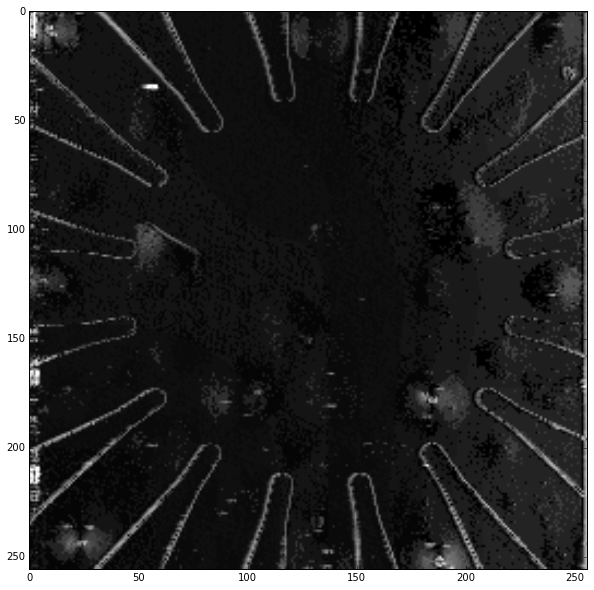

In [53]:
plt.figure(figsize=(10,10))

ddd = abs(img-np.mean(img[50:200,50:200])).astype(np.uint8)
ddd-=ddd.min()
ddd[ddd>50] = 50 

plt.imshow(ddd,cmap='gray')

In [ ]:
ddd

In [ ]:
img

In [ ]:
plt.hist(ddd.flatten(), bins=np.linspace(0,255,256))
plt.show()